<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Lineal Multivariada</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Regresión Lineal Multivariado
<font color=black> La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta (Y) se determina a partir de un conjunto de variables independientes llamadas predictores $(X_1, X_2, X_3…)$. Es una extensión de la regresión lineal simple, por lo que es fundamental comprender esta última. Los modelos de regresión múltiple pueden emplearse para predecir el valor de la variable dependiente o para evaluar la influencia que tienen los predictores sobre ella (esto último se debe analizar con cautela para no malinterpretar causa-efecto).

<font color=black> Los modelos lineales múltiples siguen la siguiente ecuación:
$$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$$
 
<font color=black> En este caso, se está haciendo referencia al valor de $y$  para una observación $i$  concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error  $ϵ$.

<font color=black> Computacionalmente, estos cálculos son más eficientes si se realizan de forma matricial:
$$\mathbf{y}=\mathbf{X}^T \mathbf{\beta}+\epsilon$$

<font color=black> $$\mathbf{y}=\begin{bmatrix} y_1\\  y_2\\  ...\\ y_n\end{bmatrix} \ , \ \ \ \mathbf{X}=\begin{bmatrix} 1 & x_{11} & ... & x_{1p}\\  1 & x_{21} & ... & x_{2p}\\  1 & ... &  ... & ... \\  1 &  x_{n1} & ... &x_{np}\\   \end{bmatrix} \ , \ \ \ \mathbf{\beta}=\begin{bmatrix} \beta_0\\ \beta_1\\  ...\\ \beta_n\end{bmatrix} \ , \ \ \ \mathbf{\epsilon}=\begin{bmatrix} \epsilon_1\\ \epsilon_2\\  ...\\ \epsilon_n\end{bmatrix}$$
    
<font color=black> $$\hat{\beta} = \underset{\beta}{\arg\min} (\mathbf{y} - \mathbf{X}^T \mathbf{\beta})^2$$
    
<font color=black> Una vez estimados los coeficientes, se pueden obtener las estimaciones de cada observación ($\hat{y}_i$):
$$\hat{y}_i= \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + ... + \hat{\beta}_p x_{ip}$$

<font color=black> Finalmente, la estimación de la varianza del modelo ($\hat{σ}^2$) se obtiene como:
$$\hat{\sigma}^2 = \frac{\sum^n_{i=1} \hat{\epsilon}_i^2}{n-p} = \frac{\sum^n_{i=1} (y_i - \hat{y}_i)^2}{n-p}$$

<font color=black> donde $n$  es el número de observaciones y $p$  el número de predictores.

In [1]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as skms
import sklearn as sk
#from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Métricas de la Regresión Lineal Multivariado
<font color=black> El módulo sklearn.metrics tiene implementadas varias métricas estadísticas que permiten medir el rendimiento (o 'robustes') de la regresión. Algunas de ellas han sido mejoradas para manejar el caso de multi-salidas, están son:  **Error cuadrático medio (mean_squared_error), Error medio absoluto (mean_absolute_error), Variancia explicada (explained_variance_score) and Coeficiente de regresión (r2_score)**.

In [2]:
datafile="C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_datos/Datos/propiedad_1.xls"#este archivo contiene tres hojas de calculo 
data = pd.read_excel(datafile, sheet_name=None, header=0)
datacc=data['calibracion']
yprop=datacc['Measured']
ypred=datacc['Predicted']
data['calibracion'].head()

,Predicted,Measured
0,8.876835,8.964832
1,6.577969,6.600000
2,8.027663,8.200000
3,6.401841,6.300000
4,7.413652,7.354888


<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Variancia explicada (explained_variance_score)
<font color=black> Esta métrica compara la salidad estimada con la respuesta correcta a partir de la siguiente relación:
$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$
Cuando el valor está cercano uno se entiende que la regresión presenta un buen rendimiento, lo contrario, valores cercanos a cero, indica un mal rendimiento del modelo.

In [3]:
import sklearn.metrics as skmt
skmt.explained_variance_score(yprop, ypred)
#skmt.explained_variance_score(y_true, y_pred, multioutput='raw_values')
#explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.9979061829168103

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error Máximo (Max Error)
<font color=black> La función de máximo error calcula el máximo error residual, esta métrica captura el peor error entre la medida y la propiedad.
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el máximo error está definido por:
$$\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)$$

In [4]:
skmt.max_error(yprop, ypred)

0.34735613298853973

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error absoluto promedio (mean_absolute_error)
<font color=black> La función mean_absolute_error calcula el error absoluto medio y corresponde a una métrica que evalua el riesgo de error del modelo. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error absoluto medio (MAE) sobre un numero de muestras $n_{samples}$ está definido por:
$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

In [5]:
skmt.mean_absolute_error(yprop, ypred)
#mean_absolute_error(yprop, Y_pred, multioutput='raw_values')

0.08440645368976418

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error cuadrático medio (mean_squared_error)
<font color=black> La función mean_squared_error calcula el error cuadrático medio y corresponde a una métrica que evalua el riesgo de error del modelo. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error cuadrático medio (MSE) sobre un número de muestras $n_{samples}$ está definido por:
$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

In [6]:
skmt.mean_squared_error(yprop, ypred)

0.01168994115149349

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error logarítmico cuadrático medio (mean_squared_log_error)
<font color=black> La función mean_squared_log_error calcula el error logarítmico cuadrático medio y corresponde a una métrica que evalua el riesgo de error del modelo, especialmente cuando la respuesta tiene un crecimiento exponencial con la variable independiente o predictores. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error logarítmico cuadrático medio (MSLE) sobre un número de muestras $n_{samples}$ está definido por:
$$\text{MSLE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2$$

In [7]:
skmt.mean_squared_log_error(yprop, ypred)

0.0002272178874529681

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Coeficiente de determinación (r2_score)
<font color=black> El coeficiente de determinación, que puntualiza la regresión, conocido com $R^2$, representa la proporción de varianza (de $y$) que ha sido explicada por la(s) variables independientes del modelo.  Por ello esta métrica provee una buena indicación del ajuste y por lo tanto, es una medida de que tan probable es que el modelo prediga las muestras desconocidas, a través de la proporción de la varianza explicada. $R^2$ con valores cercanos a 1 (incluso negativo) indica un mejor ajuste del modelo y por el contrario su cercanía a cero indicaría lo contrario.
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces la estimación del $R^2$ sobre un número de $n_{samples}$ muestras, está definido por:
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

<font color=black> Donde $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ y $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

In [8]:
sk.metrics.r2_score(yprop, ypred)

#r2_score(yprop, Y_pred, multioutput='variance_weighted')
#r2_score(yprop, Y_pred, multioutput='uniform_average')
#r2_score(yprop, Y_pred, multioutput='raw_values')

0.9979061828979205

---
<font color='red' size=20>**Muestreo**

---

<p style="text-align:justify"><div class="alert alert-success">

**<font color=black size=4> Scikit Learn es la biblioteca favorita en Python para realizar muchas operaciones en Machine Learning especialmente porque contiene varios métodos de tratamiento de datos entre ellos se destacan los métodos para dividir los datos en el conjunto de entrenamiento, pruebas y validación. Los más populares son:**
- **train_test_split - crea una sola división en un set de entranamiento y un set de prueba.**
- **Kfold - crea k-divisiones que permiten realizar validación cruzada**
- **StratifiedKFold - crea k-divisines considerando la distribución de la variable dependiente**
- **cross_val_score - evalua el modelo a través de validación cruzada**

**<font color=blue size=4> Vamos  atilizar para el muestreo, dos archivos en formato de Matlab que contienen (espectros.mat), el primero, las intensidades de espectros FTIR de 82 crudos colombianos y el segundo (propiedad.mat) el valor medido de una propiedad de dichos crudos.** 

In [9]:
import scipy.io
espectros = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/espectros.mat')# este archivo contiene las intensidades de
# 82 espectros FTIR de crudos colombianos y será utilizados como ejemplo en esta sección
# del curso
propiedad = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/propiedad.mat')#Medida de asci de los crudos a los que corresponden los espectros
#ftir


**<font color=orange size=3> Los archivos de matlab (*.mat) son archivos estructurados que continen diversa información, dentro de esa información escogemos la que nos interesa, en este caso el arreglo "espectros" en el primer archivo y el arreglo "propiedades" en el segundo. Las intensidades de los espectros son los predictores y la propiedad es la variable respuesta. Posteriormente separamos las muestras en dos grupos utilizando la función train_test_split, uno será el grupo de entrenamiento y el otro el grupo de prueba del modelo.  Para el ejemplo la separación se hará de manera randómica escogiendo el 80% para entrenar y el 20% para probar.** 

In [10]:
yprop=propiedad['propiedades']
xftir=espectros['espectros']

In [13]:
yprop.shape, xftir.shape # Esto lo hacemos para verificar que tenemos el mismo número de muestras y están en la forma adecuada, esto esto es; las muestras u observaciones en las filas y predictores en columnas

((82, 1), (82, 7468))

In [12]:
yprop=yprop[0:82]

---
<font color='green' size=6>**Validación Simple**

---

**<font color=cian size=3> El método más sencillo de validación consiste en repartir aleatoriamente las observaciones disponibles en dos grupos, uno se emplea para entrenar al modelo y otro para evaluarlo. Si bien es la opción más simple, tiene dos problemas importantes:**

**<font color=cian size=3> - La estimación del error es altamente variable dependiendo de qué observaciones se incluyan como grupo de entrenamiento y cuáles como conjunto de validación (problema de varianza).**

**<font color=cian size=3> - Al excluir parte de las observaciones disponibles como datos de entrenamiento (generalmente el 20%), se dispone de menos información con la que entrenar el modelo y, por lo tanto, se reduce su capacidad. Esto suele tener como consecuencia una sobrestimación del error comparado al que se obtendría si se emplearan todas las observaciones para el entrenamiento (problema de bias).**
    
**<font color=cian size=3>Utilizaremos la función *train_test_split* del modulo *sklearn.model_selection* para separar las muestras en dos grupos, el grupo de entranamiento y el grupo de prueba. La separación la haremos usando un 80% de las muestars para el ajuste o desarrollo del modelo y un 20% para las muestras de prueba.  La separación se realiza de manera aleatoria y sin barajar.** 

In [21]:
#xftir=np.transpose(xftir)# usamos la transpuesta del archivo
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(xftir, yprop, train_size=0.8, random_state=4, shuffle= True)

**<font color=blue> Vamos  a ver como quedó el arreglo de cada grupo.** 

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 7468), (17, 7468), (65, 1), (17, 1))

In [24]:
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.006305,0.006962,0.007326,0.007350,0.007073,0.006582,0.005987,0.005386,0.004852,0.004434,...,0.004780,0.004779,0.004776,0.004770,0.004764,4.757380e-03,0.004752,4.748847e-03,0.004747,0.004747
1,0.020127,0.020466,0.020620,0.020551,0.020277,0.019855,0.019358,0.018863,0.018442,0.018164,...,0.000046,0.000050,0.000052,0.000051,0.000046,3.938336e-05,0.000030,2.054740e-05,0.000010,0.000000
2,0.012725,0.012220,0.011552,0.010823,0.010147,0.009608,0.009243,0.009031,0.008933,0.008919,...,0.000046,0.000043,0.000043,0.000043,0.000044,4.429126e-05,0.000046,4.773154e-05,0.000052,0.000058
3,0.006624,0.006846,0.006878,0.006786,0.006664,0.006602,0.006648,0.006787,0.006954,0.007059,...,0.023228,0.023247,0.023263,0.023274,0.023281,2.328317e-02,0.023283,2.328247e-02,0.023282,0.023282
4,0.005929,0.005711,0.005497,0.005390,0.005460,0.005715,0.006101,0.006534,0.006936,0.007267,...,0.000112,0.000104,0.000095,0.000086,0.000079,7.442100e-05,0.000072,7.270014e-05,0.000076,0.000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.037838,0.036763,0.035667,0.034714,0.034033,0.033670,0.033575,0.033622,0.033667,0.033607,...,0.000029,0.000022,0.000018,0.000015,0.000014,1.351454e-05,0.000013,1.055820e-05,0.000006,0.000000
61,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,0.003976
62,0.005047,0.005634,0.006129,0.006570,0.006987,0.007377,0.007697,0.007893,0.007931,0.007828,...,0.000067,0.000069,0.000076,0.000085,0.000096,1.063675e-04,0.000116,1.231648e-04,0.000127,0.000128
63,0.004346,0.005010,0.005733,0.006508,0.007290,0.007979,0.008447,0.008592,0.008380,0.007868,...,0.000871,0.000873,0.000873,0.000872,0.000870,8.680065e-04,0.000867,8.662705e-04,0.000867,0.000868


---
<font color=cian size=6>**Validación Cruzada K-Fold**

---

**<font color=green size=3>El método de validación cruzada K-Fold es un proceso iterativo. Consiste en dividir los datos de forma aleatoria en k grupos de aproximadamente el mismo tamaño, k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación. Este proceso se repite k veces utilizando un grupo distinto como validación en cada iteración. El proceso genera k estimaciones del error cuyo promedio se emplea como estimación final o se escoge el mejor grupo como grupo de entrenamiento y prueba para el modelo.** 
    
**<font color=green size=3>Usaremos la función *Kfold* del modulo *sklearn.model_selection* usando dos valores de *k* para observar como ocurre la separación. También emplearemos el modo aleatorio y el concepto de barajar.** 

In [29]:
# Para demostrar como KFold separa los datos, crearemos dos modos, uno KFold 2 y 4. 
kf2 = sk.model_selection.KFold(n_splits=2, shuffle=False) # La separación se realiza de acuerdo con la siguiente ecuación 1/(n_split), en este caso es 0.5, osea 50/50
kf10 = sk.model_selection.KFold(n_splits=10, shuffle=False) # En este caso es 1/10 = 0.1, 90/10

In [30]:
# Podemos obtener los índices de los datos almacenados en la separación usando un for 
for train_index, test_index in kf2.split(yprop):
    print(train_index, test_index)

[41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]


In [31]:
# Podemos obtener los índices de los datos almacenados en la separación usando un for 
for train_index, test_index in kf10.split(yprop):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81] [ 9 10 11 12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81] [18 19 20 21 22 23 24 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81] [26 27 28 29 30 31 32 3

In [32]:
# Utilizando la función np.take() y los indices, obtenemos los datos de los predictores
for train_index, test_index in kf2.split(yprop):
    print(np.take(xftir,train_index), np.take(xftir,test_index))

[0.0130285  0.01313195 0.01327425 0.01348852 0.01376589 0.01406099
 0.01430127 0.01442255 0.01439443 0.01423829 0.01402098 0.01383022
 0.01373439 0.01375833 0.01387653 0.01403032 0.01415401 0.01420186
 0.01415753 0.0140353  0.01386417 0.01367473 0.0134851  0.0133027
 0.01312796 0.0129677  0.01283344 0.01274589 0.01272142 0.01276876
 0.01288465 0.01306124 0.01328983 0.01356689 0.01389048 0.0142535
 0.01463543 0.01500353 0.01531753 0.01554325 0.01566158] [0.0110966  0.01119915 0.01098486 0.01054341 0.01002245 0.00955765
 0.00923784 0.00908481 0.0090711  0.00914556 0.00926567 0.00940403
 0.00954942 0.00968954 0.00981006 0.00989108 0.00992538 0.00992208
 0.00991754 0.00995951 0.01009289 0.01033649 0.01067365 0.01105651
 0.01143135 0.01175163 0.01199488 0.01215925 0.01225536 0.01229481
 0.01228755 0.01223893 0.01216186 0.01207684 0.01201882 0.01202307
 0.01211627 0.01229574 0.01252352 0.01274327 0.01291152]
[0.0110966  0.01119915 0.01098486 0.01054341 0.01002245 0.00955765
 0.00923784 0.009

In [10]:
# Hacemos lo mismo para la variable dependiente o la propiedad
for train_index, test_index in kf2.split(yprop):
    print(np.take(yprop,train_index), np.take(yprop,test_index))

[17 12 17  8 17 17 17 17  6 17 12 15 14 20 20 11 16 17 17 13 15 16 15 14
 15 10 20 14 20 10  9 13 11 12 13  8 10  9 11 12 11] [10 10 13 11 11 14 10 14 16 18 16 12 15 17 10 12 12 12 15 19 15 11 12 17
 11 11 16 19 20 16 13 15 13 14 13  5 11 12 18 15 17 16]
[10 10 13 11 11 14 10 14 16 18 16 12 15 17 10 12 12 12 15 19 15 11 12 17
 11 11 16 19 20 16 13 15 13 14 13  5 11 12 18 15 17 16] [17 12 17  8 17 17 17 17  6 17 12 15 14 20 20 11 16 17 17 13 15 16 15 14
 15 10 20 14 20 10  9 13 11 12 13  8 10  9 11 12 11]


**<font color=red size=3>Veamos ahora de forma ilustrativa este sistema de separación o muestreo.** 

In [33]:
# create the range 1 to 25
rn = range(1,26)

In [37]:
# Realizamos dos KFold y co k igual a 3 y otro k igual 5
kf5 = sk.model_selection.KFold(n_splits=5, shuffle=False)
kf3 = sk.model_selection.KFold(n_splits=3, shuffle=False)

In [38]:
# Leemos los indices
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [39]:
# Con los índices obtenemos los valores de los datos
for train_index, test_index in kf5.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5]
[ 1  2  3  4  5 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [ 6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 16 17 18 19 20 21 22 23 24 25] [11 12 13 14 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 21 22 23 24 25] [16 17 18 19 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [21 22 23 24 25]


In [41]:
# Vamos a hacer una grafica para mostra mejor el funcionamiento de KFold. Creamos una función que permita mostrar cada punto corrido en el espacio
 

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

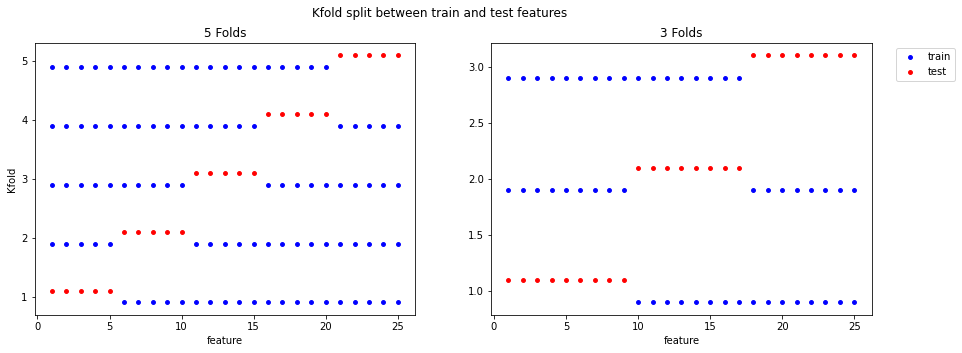

In [42]:
# Ahora Graficamos
import matplotlib.pyplot as plt

train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**<font color=red size=3>Veamos como funciona el KFold aleatorio.** 

In [47]:
kf42 = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=123)

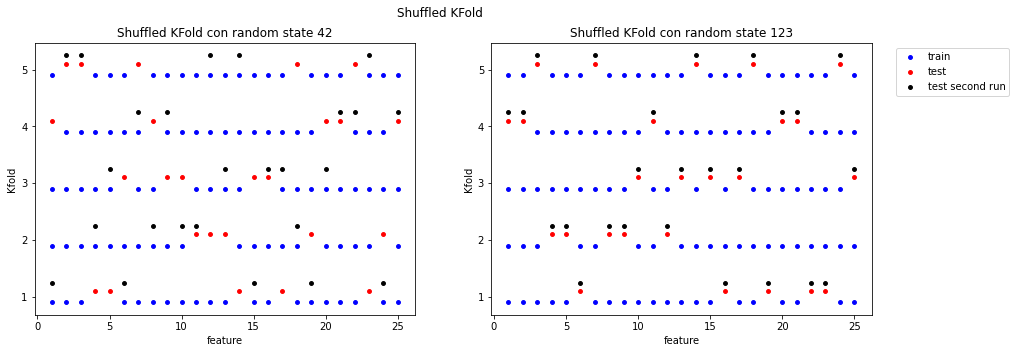

In [48]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)
train42_2, test42_2 = kfoldize(kf42,rn, shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[0].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test42_2)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold con random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("Shuffled KFold con random state 123")
plt.suptitle("Shuffled KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**<font color=red size=3>Kfold varias veces (repetido).** 

In [49]:
from sklearn.model_selection import RepeatedKFold

kf42 = sk.model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
krf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

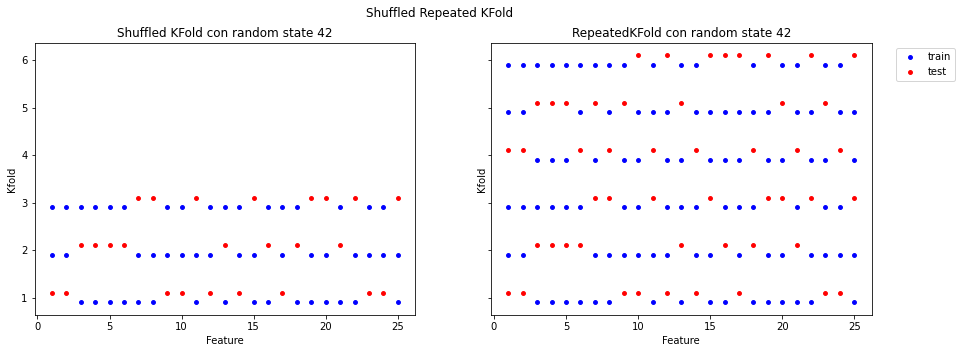

In [50]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(krf42,rn)
#train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("Feature")
ax[0].set_title("Shuffled KFold con random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("Feature")
ax[1].set_title("RepeatedKFold con random state 42")
plt.suptitle("Shuffled Repeated KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

---
<font color=red size=6>**Validación Cruzada "Leave One Out (LOOCV)"**

---

**<font color=blue size=3>El método LOOCV en un método iterativo que se inicia empleando como conjunto de entrenamiento todas las observaciones disponibles excepto una, que se excluye para emplearla como validación. Si se emplea una única observación para calcular el error, este varía mucho dependiendo de qué observación se haya seleccionado. Para evitarlo, el proceso se repite tantas veces como observaciones disponibles, excluyendo en cada iteración una observación distinta, ajustando el modelo con el resto y calculando el error con dicha observación. Finalmente, el error estimado por el LOOCV es el promedio de todos lo $i$ errores calculados.** 
    
**<font color=blue size=3>LOOCV es un método de validación muy extendido ya que puede aplicarse para evaluar cualquier tipo de modelo. Sin embargo, los autores de An Introduction to Statistical Learning consideran que, al emplearse todas las observaciones como entrenamiento, se puede estar cayendo en overfitting, por lo que, aun considerándolo muy aceptable, recomiendan emplear K-Fold Cross-Validation.** 

**<font color=red size=3>Veamos gráficamente.** 

In [51]:
from sklearn.model_selection import LeaveOneOut

kf42 = sk.model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
loo = LeaveOneOut()

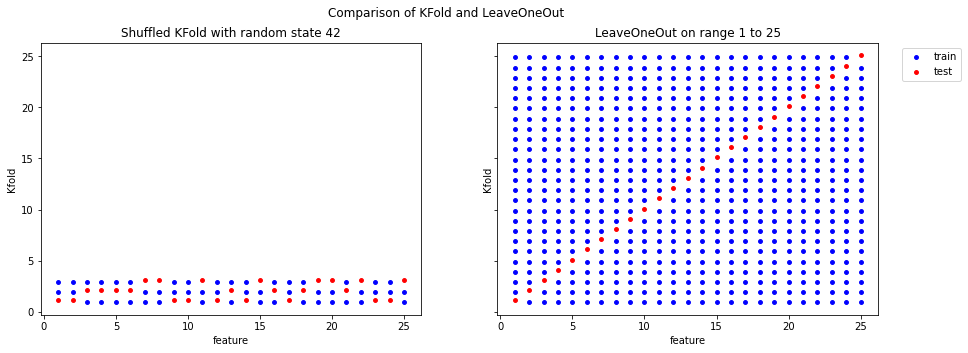

In [52]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(loo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeaveOneOut on range 1 to 25")
plt.suptitle("Comparison of KFold and LeaveOneOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()